In [2]:
import numpy as np 
import pandas as pd 

In [3]:
path_to_data = '/Users/enzo-macmini/PythonProjects/JMP/FoxBajari_Data/data/'

In [4]:
df_air_travel = pd.read_csv(path_to_data + 'air-travel-passengers-bta-year-1994.csv')

df_air_travel.shape

(492, 493)

In [5]:
# travel data
df_travel_survery = pd.read_csv(path_to_data + 'american-travel-survey-1995-zero.csv')
df_travel_survery.shape

(492, 493)

In [6]:
btamatrix_merged = pd.read_csv(path_to_data + 'btamatrix_merged.csv')
btamatrix_merged.shape

(492, 494)

In [7]:
geo_distance = pd.read_csv(path_to_data + 'geographic-distance-population-weighted-centroid.csv')
geo_distance.shape

(492, 493)

In [8]:
bta_data = pd.read_csv(path_to_data + 'btadata_2004_03_12_1.csv')
bta_data

,bta,market,bid,winner,bidder_num_fox,pop90,percapin,hhinc35k,density,imwl
0,1,Aberdeen,411666.0,MCG,202,88891.0,14926.000,0.405000,7.536484,9
1,2,Aberdeen,471750.0,CookWest,184,83057.0,16374.000,0.433000,55.249180,3
2,3,"Abilene,",4024583.0,PokaLam,164,253174.0,15377.000,0.421000,54.129910,14
3,4,"Ada, OK",783000.0,OnQue,238,52677.0,12644.000,0.318000,32.020280,0
4,5,"Adrian,",701250.0,DCR,190,91476.0,16069.000,0.530000,256.705900,0
...,...,...,...,...,...,...,...,...,...,...
488,489,Mayaguez,29400000.0,PCS2000,182,1351600.0,3323.522,0.095447,1016.579000,0
489,490,Guam,1073250.0,DCR,190,133000.0,3345.715,0.095447,1504.793000,1
490,491,US Virgi,7797750.0,Windkeep,38,102000.0,3693.983,0.105383,1504.793000,1
491,492,American,411000.8,National,66,47000.0,3345.715,0.095447,1504.793000,0


In [9]:
bidder_data = pd.read_csv(path_to_data + 'biddercblk_03_28_2004_pln.csv')
bidder_data

,bidder_num_fox,bidder_num,co_name,pops_eligible
0,1,2000,"MLCS Industries II, Inc.",3.777778e+06
1,2,2001,"MLCS Industries, Inc.",4.222222e+05
2,3,2004,"Holland Wireless, L.L.C.",3.166330e+05
3,4,2005,"PerCommServ, Inc.",2.412161e+06
4,5,2006,E. Ritter Telephone Company,7.944667e+04
...,...,...,...,...
251,252,2376,"BRK WIRELESS CO., INC.",1.111111e+06
252,253,2377,"SJI, Inc.",2.582988e+06
253,254,2378,"Longstreet Communication International, Inc",5.706730e+05
254,255,2379,Shawn Capistrano,2.512578e+05


In [50]:
# take column pops_eligible to np array
pop_elig_i = np.array(bidder_data['pops_eligible'])

# take rows where pops_eligible is nan
bidder_data_nan = bidder_data[bidder_data['pops_eligible'].isnull()]
print(bidder_data_nan)


pop_elig_i_nonan = pop_elig_i[~np.isnan(pop_elig_i)]

print("Non nan eligibilities: ", len(pop_elig_i_nonan), " over ",len(pop_elig_i) )
print("unique eligibility values: ", len(np.unique(pop_elig_i_nonan)))

print("######")
print("Population statistics")
print(bta_data['pop90'].mean())
print(bta_data['pop90'].std())

print(bta_data['pop90'].min())
print(bta_data['pop90'].max())

     bidder_num_fox  bidder_num                                   co_name  \
66               67        2120  South Central Utah Telephone Association   
255             256        9999                                       FCC   

     pops_eligible  
66             NaN  
255            NaN  
Non nan eligibilities:  254  over  256
unique eligibility values:  213
######
Population statistics
512284.5720081136
1300576.8298108946
27512.0
18100000.0


In [54]:
print(bta_data['pop90'].sum())

bidder_data[bidder_data['pops_eligible'] > bta_data['pop90'].sum() /2]

252556294.0


,bidder_num_fox,bidder_num,co_name,pops_eligible
76,77,2146,NextWave Personal Communications Inc.,176055555.6
247,248,2372,U.S. AirWaves Holdings Inc.,180611430.0


In [37]:
# bta where pop90 is bta_data['pop90'].max()
bta_data_maxpop = bta_data[bta_data['pop90'] >= .8 * bta_data['pop90'].max()]
print(bta_data_maxpop)

     bta    market          bid    winner  bidder_num_fox       pop90  \
261  262  Los Ange  664000000.0  NextWave              77  14500000.0   
320  321  New York  994000000.0  NextWave              77  18100000.0   

     percapin  hhinc35k   density  imwl  
261   20622.0     0.629  5578.848    52  
320   25673.0     0.652  6497.588    15  


In [55]:
bidder_data[bidder_data['pops_eligible'] >= .9 * bta_data['pop90'].max()] 

,bidder_num_fox,bidder_num,co_name,pops_eligible
76,77,2146,NextWave Personal Communications Inc.,1.760556e+08
98,99,2186,GO Telecommunications Corporation I,1.000000e+08
112,113,2207,"AirLink, L.L.C.",4.444444e+07
122,123,2224,North Coast Mobile Communications Inc.,2.600000e+07
135,136,2244,"West Coast PCS, LLC",1.991111e+07
166,167,2286,"PersonalConnect Communications, Inc.",6.666667e+07
180,181,2300,"GWI PCS, Inc.",1.199604e+08
181,182,2301,"PCS 2000, L.P.",1.111111e+08
183,184,2303,"Cook Inlet Western Wireless PV/SS PCS, L.P.",3.111111e+07
198,199,2319,KEC PARTNERSHIP,1.805062e+07


In [64]:
bidder_data[bidder_data['pops_eligible'] <= 1000000]

,bidder_num_fox,bidder_num,co_name,pops_eligible
1,2,2001,"MLCS Industries, Inc.",422222.23330
2,3,2004,"Holland Wireless, L.L.C.",316633.00000
4,5,2006,E. Ritter Telephone Company,79446.66667
5,6,2009,Southwest Texas Telephone_Company,190434.00000
7,8,2013,"WIRELESS VENTURES, INC.",555555.56670
...,...,...,...,...
239,240,2364,"SOWEGA Wireless Communications, L.P.",888888.90000
242,243,2367,"Mid-Plains Telephone, Inc.",984197.00000
245,246,2370,"VTel Wireless, Inc.",746666.66670
253,254,2378,"Longstreet Communication International, Inc",570673.00000


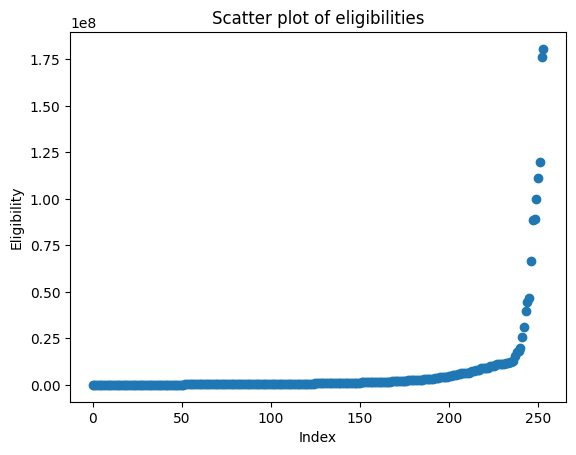

In [57]:
# scatter the eligibilities
import matplotlib.pyplot as plt

plt.scatter(range(len(pop_elig_i_nonan)), np.sort(pop_elig_i_nonan))
plt.xlabel('Index')
plt.ylabel('Eligibility')
plt.title('Scatter plot of eligibilities')
plt.show()

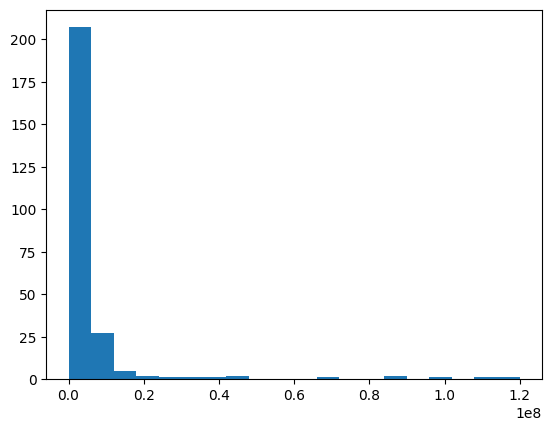

In [ ]:
# scatter the eligibilities



# plt.hist(pop_elig_i_nonan[pop_elig_i_nonan < np.sort(pop_elig_i_nonan)[-2]], bins=20)
# plt.show()